<a href="https://colab.research.google.com/github/zhus-dika/math_home_works/blob/main/hw_02_ZHUSSUPOVA_DINARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://camo.githubusercontent.com/ad20aaaa48264581c46aa126919dbb72060ebd98cffe015523549b4974843ae5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46556c79616e6b696e2f725f70726f626162696c6974792f6d61737465722f656e645f73656d696e6172732f73656d5f362f73747564656e745f746561636865725f646973742e706e67" height="200">

# Прикладаная статистика: домашнее задание 2
</center>

> скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

$\qquad$ [БутcРэп](https://www.youtube.com/watch?v=eE4qxB2E8d4)


**ФИО:**

## Общая информация


__Дата выдачи:__ 23.04.2022

__Дедлайн:__ 23:59MSK 14.05.2022

## Формат сдачи

Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## [10 баллов] Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://drive.google.com/uc?id={}'.format('16YC3uksVXh740xfw5pvmipJZyff51wlQ')
df = pd.read_csv(url)
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_extend = df.melt(id_vars=["year"], var_name="Qtr", value_name="rating")
x = df_extend[(df_extend.year > 1968) & (df_extend.year < 1973)].dropna()
y = df_extend[(df_extend.year > 1971)].dropna()
y = y[~((y.year == 1972) & ((y.Qtr == 'Qtr1') | (y.Qtr == 'Qtr2')) | (y.year == 1974) & ((y.Qtr == 'Qtr3') | (y.Qtr == 'Qtr4')))]
print(x)
print(y)

     year   Qtr  rating
24   1969  Qtr1    59.0
25   1970  Qtr1    66.0
26   1971  Qtr1    51.0
27   1972  Qtr1    49.0
54   1969  Qtr2    65.0
55   1970  Qtr2    53.0
56   1971  Qtr2    48.0
57   1972  Qtr2    61.0
84   1969  Qtr3    65.0
85   1970  Qtr3    61.0
86   1971  Qtr3    54.0
114  1969  Qtr4    56.0
115  1970  Qtr4    52.0
116  1971  Qtr4    49.0
     year   Qtr  rating
28   1973  Qtr1    68.0
29   1974  Qtr1    28.0
58   1973  Qtr2    44.0
59   1974  Qtr2    25.0
88   1973  Qtr3    40.0
118  1973  Qtr4    27.0


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [ ]:
mu_hat_x = x.rating.mean()
mu_hat_y = y.rating.mean()
n = x.shape[0]
m = y.shape[0]
var_hat_x = x.rating.var(ddof=1)
var_hat_y = y.rating.var(ddof=1)
sx = np.sqrt((var_hat_x * (n - 1) + var_hat_y * (m - 1)) / (n + m - 2))
obs = (mu_hat_x - mu_hat_y) / (sx * np.sqrt(1 / n + 1 / m))
print('obs =', obs)
pval = 1 - sts.t.cdf(x=obs, df=(n + m - 2))
print('pval =', pval)

obs = 3.5640741313229793
pval = 0.0011087344846424374


In [ ]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** Выбирается тест Стьюдента, т.к. средний рейтинг неизвестен и дисперсия равна но тоже неизвестна. В этом случае можно проверять гипотезу только по критерию Стьюдента. p_val < 0.05, поэтому нулевая гипотеза, что рейтинг президента не изменился отвергается и принимается альтернативная гипотеза.

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## [10 баллов] Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [ ]:
url = 'https://drive.google.com/uc?id={}'.format('1GtUJ3QkruGll8G5T0UTs4otnjivnjM8C')
df = pd.read_csv(url)
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
x = df[df.group < 2]
n = x.extra.count()
mu_hat = x.extra.mean()
var_hat = x.extra.var(ddof=1)
tobs1 = mu_hat / np.sqrt(var_hat / n)
print('tobs1 =', tobs1)
pval1 = 1 - sts.t.cdf(x=tobs1, df=(n - 1))
print('pval1 =', pval1)

tobs1 = 1.3257101407138212
pval1 = 0.10879889003422438


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
y = df[df.group == 2]
mu_hat = (y.extra.values - x.extra.values).mean()
n = x.shape[0]
var_hat = (y.extra.values - x.extra.values).var(ddof=1)
tobs2 = mu_hat / np.sqrt(var_hat / n)
print('tobs2 =', tobs2)
pval2 = 1 - sts.t.cdf(x=tobs2, df=(n - 1))
print('pval2 =', pval2)

tobs2 = 4.062127683382037
pval2 = 0.0014164450986920984


In [ ]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** В первом примере мы проверяли нулевую гипотезу о том, что длительность сна студентов не сильно отличается от среднего значения по Z-тесту. И был получен результат согласно `pval1>0.05`, поэтому гипотеза нулевая не отвергается. Во втором примере был рассмотрен одновыборочный t-критерий, т.к. дисперсия неизвестна, но распределение является номальным. Здесь нулевая гипотеза о том, что длительность сна после снотворного не меняется, отвергается, потому что `pval2<0.05`.

## [30 баллов] Задание 3 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками.

In [ ]:
url = 'https://drive.google.com/uc?id={}'.format('1W6huB4Ih2juhMCsQEshaRnNrriB6VDze')
df = pd.read_csv(url)[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

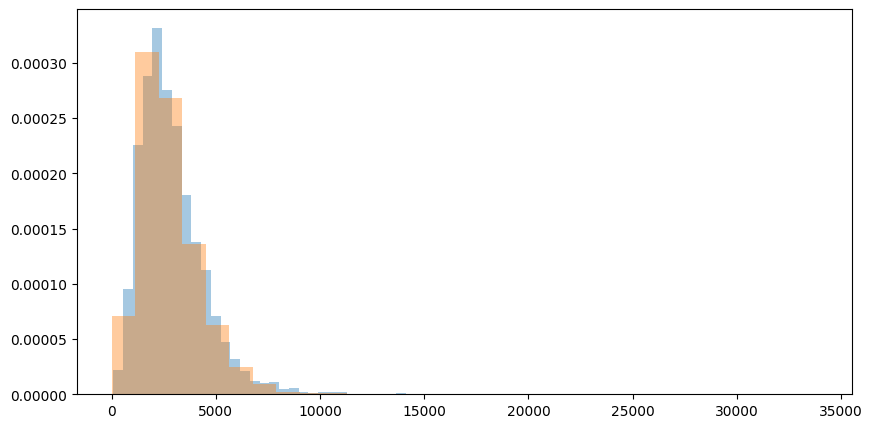

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
x = df[df.I== True].likes.values
y = df[df.I == False].likes.values

plt.figure(figsize = (10, 5))
plt.hist(x, bins=30, density=True, alpha=0.4, label='yes');
plt.hist(y, bins=30, density=True, alpha=0.4, label='no');

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
np.median(x), np.median(y)

(2588.5, 2497.0)

In [ ]:
np.mean(x), np.mean(y)

(2879.1828885400314, 2784.0432051478474)

Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
np.random.seed(121)
n_x = len(x)
n_y = len(y)

mu_hat_x = x.mean()
mu_hat_y = y.mean()
var_hat_x = x.var(ddof=1)
var_hat_y = y.var(ddof=1)
z_obs = (mu_hat_x - mu_hat_y) / np.sqrt(var_hat_x / n_x + var_hat_y / n_y)
print(z_obs)

2.6644610922505323


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
alpha = 0.05
norm_rv = sts.norm()
z_crit = norm_rv.ppf(1 - alpha / 2)
pval = 1 - sts.norm.cdf(z_obs)
print('z_crit =', z_crit)
print('pval =', pval)

z_crit = 1.959963984540054
pval = 0.0038555893027214516


🐮 Согласно полученным результатам теста, наблюдаемое значение `z_obs` далеко от критического значения `z_crit` и `pval < alpha`. Гипотезу можно отвергнуть, т.к. два показателя указывают о статистической незначимости нулевой гипотезы.

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода
z-теста?

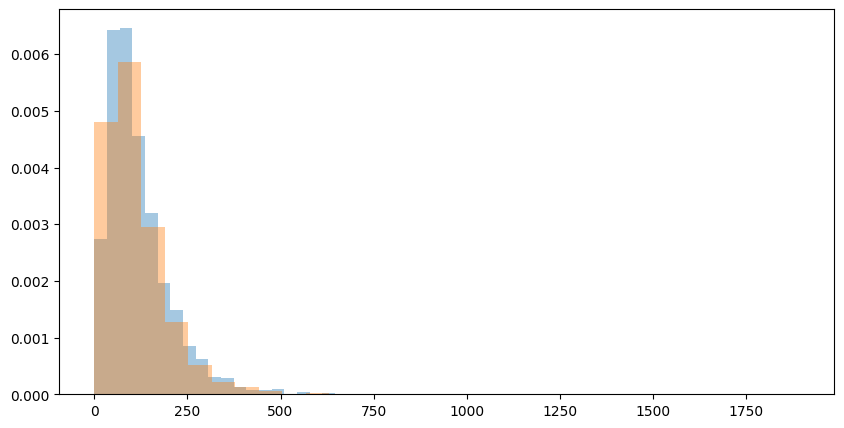

In [ ]:
x = df[df.I== True].reposts.values
y = df[df.I == False].reposts.values

plt.figure(figsize = (10, 5))
plt.hist(x, bins=30, density=True, alpha=0.4, label='yes');
plt.hist(y, bins=30, density=True, alpha=0.4, label='no');

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

sts.mannwhitneyu (x, y, alternative='two-sided')

MannwhitneyuResult(statistic=8640671.0, pvalue=0.003728256596733177)

🦒 Согласно полученным результатам гипотезу нулевую отвергаем, потому что `pval < alpha`.

Проверьте гипотезу о мудрости с помощью бутстрапа. Нулевую гипотезу сформулируйте в терминах медиан.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
def get_bootstrap_sample(x, B_sample=1):
  n = x.size
  sample = np.random.choice(x, size=(n, B_sample), replace=True)
  if B_sample == 1:
    sample = sample.T[0]
  return sample

In [ ]:
x_boot = get_bootstrap_sample(x, B_sample=10**5)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**5)
y_boot = np.median(y_boot, axis=0)

In [ ]:
def stat_intervals(boot, alpha=0.05):
  left = np.quantile(boot, alpha / 2)
  right = np.quantile(boot, 1 - alpha / 2)
  return left, right

In [ ]:
stat_intervals(x_boot)

(94.0, 100.0)

In [ ]:
stat_intervals(y_boot)

(91.0, 96.0)

In [ ]:
stat_intervals(x_boot - y_boot)

(-1.0, 7.0)

🐯 Ноль попадает в доверительный интервал разности, поэтому на уровне значимости 5% есть пересечение интервалов для медиан. Нулевая гипотеза не отвергается.

## [10 баллов] Задание 4 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

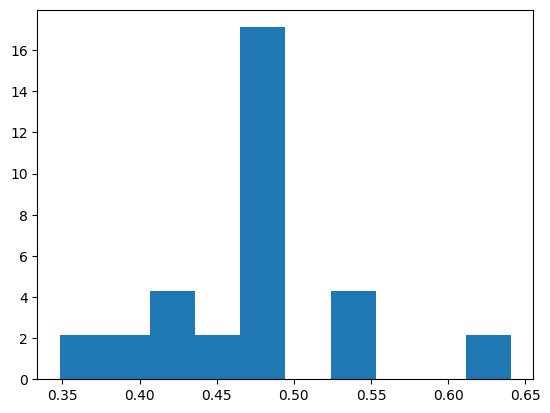

In [ ]:
url = 'https://drive.google.com/uc?id={}'.format('1rAbVMura4NSNft-05RjiK4B13FvtdgJ5')
x = pd.read_csv(url, header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

In [ ]:
y = 1 - x # время проведенное в комнате без зеркала

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from statsmodels.stats.descriptivestats import sign_test

_, pvalue_1 = sign_test(x - y)
pvalue_1

0.021270751953125

🐑 Нулевая гипотеза состоит в том, что время проведенное мышек в комнате с зеркалом и без одинаковы. Мы применяем знаковый критерий двухвыборочный для связанных выборок. Получаем, что `pvalue_1 < alpha`, значит гипотеза отвергается.

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

_, pvalue_2 = sts.wilcoxon(x, y)
pvalue_2

0.09344482421875

🐧 Гипотеза о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона показал положительный результат `pvalue_2 > alpha`, поэтому гипотезу можно принять.

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

In [ ]:
from statsmodels.stats.weightstats import ztest,zconfint

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
left, right = zconfint(x - y)
print(left, right)
stat, pvalue_3 = ztest(x - y)
print(stat, pvalue_3)

-0.11416433565289634 0.015319910652896354
-1.4961782502486838 0.13460721078205815


🪲 Нулевая гипотеза по прежнему об одинаковой распределенности времени в двух комнатах не отвергается, потому что `pvalue_3 > alpha`. Хотя наблюдаемая статистика не попадает в доверительный интервал.

In [ ]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

🦩__Ответ:__ Получаем разные значения `pvalue`, потому что есть связанность выборок и в разных подходах теряется информация. Согласно результатам исследований на мышах описанных в статье, зеркало негативно воспринимается грызунами и принято решение не обогащать помещение зеркалами для подопытных.

## [10 баллов] Задание 5 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать.

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим.

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


🦏 Использовала материалы из статьи https://habr.com/ru/companies/avito/articles/709596/

In [ ]:
from statsmodels.stats.proportion import proportion_confint

alpha = 0.05
mann_bad_cnt = 0
ttest_bad_cnt = 0

sz = 1000
for i in range(sz):
    test = sts.uniform(loc=-1, scale=2).rvs(1000) # U[-1, 1]
    control = sts.uniform(loc=-10, scale=20).rvs(1000) # U[-10, 10]

    mann_pvalue = sts.mannwhitneyu(control, test, alternative='two-sided').pvalue
    ttest_pvalue = sts.ttest_ind(control, test, alternative='two-sided').pvalue

    if mann_pvalue < alpha:
        mann_bad_cnt += 1

    if ttest_pvalue < alpha:
        ttest_bad_cnt += 1

left_mann_level, right_mann_level = proportion_confint(count = mann_bad_cnt, nobs = sz, alpha=0.05, method='wilson')
left_ttest_level, right_ttest_level = proportion_confint(count = ttest_bad_cnt, nobs = sz, alpha=0.05, method='wilson')

print(f"Mann-whitneyu significance level: {round(mann_bad_cnt / sz, 4)}, [{round(left_mann_level, 4)}, {round(right_mann_level, 4)}]")
print(f"T-test significance level: {round(ttest_bad_cnt / sz, 4)}, [{round(left_ttest_level, 4)}, {round(right_ttest_level, 4)}]")

Mann-whitneyu significance level: 0.108, [0.0902, 0.1288]
T-test significance level: 0.045, [0.0338, 0.0597]


In [ ]:
from statsmodels.stats.proportion import proportion_confint

alpha = 0.05
mann_bad_cnt = 0
ttest_bad_cnt = 0

sz = 1000
for i in range(sz):
    test = sts.uniform(loc=-10, scale=20).rvs(1000) # U[-1, 1]
    control = sts.uniform(loc=-10, scale=20).rvs(1000) # U[-10, 10]

    mann_pvalue = sts.mannwhitneyu(control, test, alternative='two-sided').pvalue
    ttest_pvalue = sts.ttest_ind(control, test, alternative='two-sided').pvalue

    if mann_pvalue < alpha:
        mann_bad_cnt += 1

    if ttest_pvalue < alpha:
        ttest_bad_cnt += 1

left_mann_level, right_mann_level = proportion_confint(count = mann_bad_cnt, nobs = sz, alpha=0.05, method='wilson')
left_ttest_level, right_ttest_level = proportion_confint(count = ttest_bad_cnt, nobs = sz, alpha=0.05, method='wilson')

print(f"Mann-whitneyu significance level: {round(mann_bad_cnt / sz, 4)}, [{round(left_mann_level, 4)}, {round(right_mann_level, 4)}]")
print(f"T-test significance level: {round(ttest_bad_cnt / sz, 4)}, [{round(left_ttest_level, 4)}, {round(right_ttest_level, 4)}]")

Mann-whitneyu significance level: 0.053, [0.0407, 0.0687]
T-test significance level: 0.053, [0.0407, 0.0687]


🦆 Чтобы показать, что тест Манна-Уитни может работать некорректно, можно рассмотреть разные распределения, но их средние и медианы равны. Генерируем выборки из распределений равномерных `U[-1,1]` и `U[-10,10]`. Вначале зафиксировав уровень значимости, мы должны были при проверке гипотезы об одинаковой распределенности получить больше отвержений и, наоборот при проверке гипотезы о равных средних или медианах меньше отвержений нулевой гипотезы, в реальности получили около 11%. Для сравнения был использован тест Стьюдента, который отклонял принятие гипотезы в районе допустимой ошибки `alpha`. Для того, чтобы проверить корректную работу теста Манна-Уитни для одинаковых распределений были построены тесты с одинаковым распределением `U[-1,1]`. Для этих выборок ошибки оказались в пределах уровня значимости.

## [10 баллов] Задание 6 (проблема подглядывания)

Предположим, что мы отошли от классической схемы проведения АБ тестов и решили подводить итоги на уровне значимости 5% каждый день. Мы держим тест две недели. Если хотябы в один из дней p-value оказывается ниже $0.05,$ мы останавливаем тест и делаем выводы, что гипотеза не отвергается.

Так делать нельзя. Это называется проблемой подглядывания. В случае такой процедуры уровень значимости выходит из-под контроля. Давайте убедимся в этом с помощью симуляций.

- Запланируйте АБ-тест для долей таким образом, чтобы ошибка 1 и 2 рода были равны 5%. В качестве MDE возьмите любое значение.
- Сгенерируйте нужное количество наблюдений. Разбейте его на 14 частей (тест идет 2 недели)
- Проверяйте гипотезу каждый день и останавливайтесь, если она не отвергается
- Какими оказались ошибки 1 и 2 рода в реальности?

Симуляции надо провести отдельно для верности нулевой гипотезы и отдельно для верности альтернативной гипотезы.

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
def get_size(p0, pa, alpha, beta):
  za = sts.norm.ppf(1 - alpha)
  zb = sts.norm.ppf(1 - beta)
  n = za * np.sqrt(p0 * (1 - p0)) + zb * np.sqrt(pa * (1 - pa))
  n /= (pa - p0)
  return int(np.ceil(n * n))

In [75]:
sz = get_size(0.1, 0.14, 0.05, 0.05)
sz

708

### 🐦 В первой симуляции мы генерируем выборку из распределения Бернулли с `p=0.1`.
Проводим `A/A` тесты для демонстрации негативного эффекта подглядывания, т.е. тест останавливается тогда, когда выполняется условие `pvalue<alpha`. Всего количество симуляций 10000.

In [76]:
from statsmodels.stats.weightstats import ztest

#A/A tests
# Заводим счетчики количества отвергнутых гипотез для z-test
z_cnt = 0
ttest_bad_cnt = 0
global_num = 10000
num_experiments = 14
sz_day = int(sz / num_experiments + 1)
for _ in range(global_num):
  control = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  test = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  for i in range(num_experiments):
      # Проверяем гипотезу
      _, zpval = ztest(test[i * sz_day : (i + 1) * sz_day - 1], control[i * sz_day : (i + 1) * sz_day - 1])
      if zpval < 0.05:
          z_cnt += 1
          break

# Выводим результаты
print(f"Z test power: {round(z_cnt / global_num, 4)}")

Z test power: 0.5802


🦓 Проводим те же A/A тесты, но проверка условия `pvalue<alpha` проводится только в конце эксперимента в последний 14-й день.

In [86]:
from statsmodels.stats.weightstats import ztest

#A/A tests
# Заводим счетчики количества отвергнутых гипотез для z-test
z_cnt = 0
ttest_bad_cnt = 0
global_num = 10000
num_experiments = 14
sz_day = int(sz / num_experiments + 1)
for _ in range(global_num):
  control = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  test = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  for i in range(num_experiments):
      # Проверяем гипотезу
      _, zpval = ztest(test[i * sz_day : (i + 1) * sz_day - 1], control[i * sz_day : (i + 1) * sz_day - 1])
  if zpval < 0.05:
      z_cnt += 1

# Выводим результаты
print(f"Z test power: {round(z_cnt / global_num, 4)}")

Z test power: 0.057


🐎 **Результаты**

*  в первом примере мы получили 58% ложноположительных результатов, только лишь из-за того, что подглядывали за экспериментами,
*   а во втором примере, все в по плану, ошибка I рода была допущена в пределах `alpha`.

### 🦣 Во второй симуляции мы генерируем выборку из распределения Бернулли с `p=0.1` и `p=0.15`.
Проводим A/B тесты.

In [78]:
from statsmodels.stats.weightstats import ztest

#A/B tests
# Заводим счетчики количества отвергнутых гипотез для z-test
z_cnt = 0
ttest_bad_cnt = 0
global_num = 10000
num_experiments = 14
sz_day = int(sz / num_experiments + 1)
for _ in range(global_num):
  control = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  test = sts.bernoulli(p=0.14).rvs(sz_day * num_experiments)
  for i in range(num_experiments):
      # Проверяем гипотезу
      _, zpval = ztest(test[i * sz_day : (i + 1) * sz_day - 1], control[i * sz_day : (i + 1) * sz_day - 1])
      if zpval < 0.05:
          z_cnt += 1
          break

# Выводим результаты
print(f"Z test power: {round(z_cnt / global_num, 4)}")

Z test power: 0.8491


In [79]:
from statsmodels.stats.weightstats import ztest

#A/A tests
# Заводим счетчики количества отвергнутых гипотез для z-test
z_cnt = 0
ttest_bad_cnt = 0
global_num = 10000
num_experiments = 14
sz_day = int(sz / num_experiments + 1)
for _ in range(global_num):
  control = sts.bernoulli(p=0.1).rvs(sz_day * num_experiments)
  test = sts.bernoulli(p=0.14).rvs(sz_day * num_experiments)
  for i in range(num_experiments):
      # Проверяем гипотезу
      _, zpval = ztest(test[i * sz_day : (i + 1) * sz_day - 1], control[i * sz_day : (i + 1) * sz_day - 1])
  if zpval < 0.05:
      z_cnt += 1

# Выводим результаты
print(f"Z test power: {round(z_cnt / global_num, 4)}")

Z test power: 0.1242


🦤 **Результаты**

*  в первом примере мы получили 85% положительных результатов с подглядыванием за экспериментами,
*   а во втором примере, все в по плану, гипотеза не отвергается.

## [20 баллов] Задание 7 (онлифанс)

Эта задача на то, что ты выигрываешь или проигрываешь, если отказываешься от АБ-тестов и просто принимаешь решение об изенениях по среднему. Задание довольно творческое, так как способ симуляции вам предстоит придумать самостоятельно.

У Аделины и Беллы есть аккаунты на онлифанс с конверсией $p=0.2\%$. Они меняют вёрстки и смотрят, как дела с деньгами. Белла нанаяла аналитика и принимает решения об изменениях по $p-value < 0.05,$ а Аделина просто смотрит на среднее и катит по нему. Например, если на старом дизайне из тысячи посетителей только $299$ оставило копеечку, а на новом — $300$, берём новый. Если наоборот — оставляем старый.

Пусть у каждой было $100$ правочек. Правочки одинаковые для обеих девушек. На них работает один и тот же фронтендер. Будем считать, что правочки независимы друг от друга. То есть, в какой бы момент мы не выкатили правочку, у нас всегда от неё будет одинаковое воздействие на конверсию. У каждой девушки было $100$ правочек. Кто после сотни правочек вырвется вперёд по конверсии?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
